<a href="https://colab.research.google.com/github/kasanchezf/Entreganumero4/blob/main/Copia_de_Entregable4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ENTREGA FINAL BOOTCAMP**

# **LOS PROGRAMAS DE SUBSIDIOS MÁS IMPORTANTES EN LOS ÚLTIMOS 5 AÑOS Y SU RELEVANCIA EN LAS ZONAS RURALES**

`La adquisición de vivienda postpandemia se ha visto afectada debido a la recesión económica que está presentando el país, en el 1er trimestre 2024 las ventas de vivienda cayeron 17,7% de acuerdo con información brindada por Camacol. La crisis del sector vivienda continúa y ya son 21 meses de caídas continuas en las ventas y uno de los auxilios más importantes para los colombianos son los subsidios gubernamentales, esto como colchón para iniciar la adquisición de una propiedad raíz.`

## **LIMPIEZA DE DATOS**

---



El presente notebook busca brindar a detalle el paso a paso del proceso de limpieza/refinamiento de datos, es importante resaltar que este busca garantizar que los datos sean relevantes, homogeneizados y categorizados para que los usuarios puedan obtener resultados significativos

### *Instalación de bibliotecas*
1.   Pandas
2.   Numpy

1.   Seaborn
2.   Matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### *Refinamiento de datos*


**A continuación vamos a refinar los datos de la tabla número 1 a la cual definiremos como df1

In [ ]:
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/kasanchezf/Entreganumero4/main/Subsidios_Asignados.csv'

# Leemos los datos desde la URL con pandas
df1 = pd.read_csv(url)
df1.head()

,Departamento,Código Divipola Departamento,Municipio,Código Divipola Municipio,Programa,Año de Asignación,Estado de Postulación,Hogares,Valor Asignado
0,MAGDALENA,47,ZONA BANANERA,47980,Bolsa Saludable,2008,Asignados,35,128955505.0
1,MAGDALENA,47,ZONA BANANERA,47980,Bolsa Desplazados,2011,Asignados,1,16068000.0
2,MAGDALENA,47,ZONA BANANERA,47980,Bolsa Desplazados,2006,Asignados,4,49701144.0
3,MAGDALENA,47,ZONA BANANERA,47980,Bolsa Desplazados,2006,Asignados,1,10200000.0
4,MAGDALENA,47,ZONA BANANERA,47980,Bolsa Saludable,2008,Apto con subsidio vencido,1,3684443.0


In [ ]:
# Verificamos los tipos de datos
print(df1.dtypes)

Departamento                     object
Código Divipola Departamento      int64
Municipio                        object
Código Divipola Municipio         int64
Programa                         object
Año de Asignación                 int64
Estado de Postulación            object
Hogares                           int64
Valor Asignado                  float64
dtype: object


In [ ]:
# Contamos el número de registros (filas) en el DataFrame
num_registros = df1.shape[0]
print(f"El número de registros en el dataset es: {num_registros}")

El número de registros en el dataset es: 77476


In [ ]:
# Verificamos si hay valores nulos
print(df1.isnull().sum())

Departamento                    0
Código Divipola Departamento    0
Municipio                       0
Código Divipola Municipio       0
Programa                        0
Año de Asignación               0
Estado de Postulación           0
Hogares                         0
Valor Asignado                  0
dtype: int64


In [ ]:
# Verificamos que en la columna "Año de Asignación" solo se encuentren datos en formato año y dejaremos los resultados a partir del 2019

df1['Año de Asignación'] = pd.to_datetime(df1['Año de Asignación'], errors='coerce', format='%Y')
df1['Año de Asignación'] = df1['Año de Asignación'].dt.year
df1_limpio = df1.dropna(subset=['Año de Asignación'])
df1_filtrado = df1_limpio[df1_limpio['Año de Asignación'] >= 2019]
print(df1_filtrado)

             Departamento  Código Divipola Departamento      Municipio  \
7               MAGDALENA                            47  ZONA BANANERA   
11              MAGDALENA                            47  ZONA BANANERA   
20           CUNDINAMARCA                            25      ZIPAQUIRÁ   
21           CUNDINAMARCA                            25      ZIPAQUIRÁ   
22           CUNDINAMARCA                            25      ZIPAQUIRÁ   
...                   ...                           ...            ...   
77431  NORTE DE SANTANDER                            54         ÁBREGO   
77432  NORTE DE SANTANDER                            54         ÁBREGO   
77437  NORTE DE SANTANDER                            54         ÁBREGO   
77438  NORTE DE SANTANDER                            54         ÁBREGO   
77464           ANTIOQUIA                             5      ABEJORRAL   

       Código Divipola Municipio                            Programa  \
7                          47980       

**Continuamos con la limpieza de la tabla número 2 a la cual definiremos como df2

In [ ]:
# URL del archivo CSV
url2 = 'https://raw.githubusercontent.com/kasanchezf/Entreganumero4/main/Subsidios_Rural.csv'

# Leemos los datos desde la URL con pandas
df2 = pd.read_csv(url2)
df2.head()

,Departamento,Código Divipola Departamento,Municipio,Código Divipola Municipio,Programa,Año de Asignacion,Estado,No.SFV Asignados,Valor Asignado
0,VICHADA,99,LA PRIMAVERA,99524,Convocatoria,2022,Asignados,40,2570400000
1,VICHADA,99,SANTA ROSALIA,99624,Convocatoria,2022,Asignados,21,1349460000
2,VICHADA,99,SANTA ROSALIA,99624,Convocatoria,2023,Asignados,4,298166400
3,VICHADA,99,CUMARIBO,99773,Convocatoria,2023,Asignados,79,5888786400
4,GUAVIARE,95,SAN JOSE DEL GUAVIARE,95001,Compromiso,2023,Asignados,80,6496000000


In [ ]:
# Verificamos los tipos de datos
print(df2.dtypes)

Departamento                    object
Código Divipola Departamento     int64
Municipio                       object
Código Divipola Municipio        int64
Programa                        object
Año de Asignacion                int64
Estado                          object
No.SFV Asignados                 int64
Valor Asignado                   int64
dtype: object


In [ ]:
# Contamos el número de registros (filas) en el DataFrame
num_registros = df2.shape[0]
print(f"El número de registros en el dataset es: {num_registros}")

El número de registros en el dataset es: 295


In [ ]:
# Verificamos si hay valores nulos
print(df2.isnull().sum())

Departamento                    0
Código Divipola Departamento    0
Municipio                       0
Código Divipola Municipio       0
Programa                        0
Año de Asignacion               0
Estado                          0
No.SFV Asignados                0
Valor Asignado                  0
dtype: int64


In [ ]:
# Contamos si hay valores duplicados en el DataFrame completo
print(df2.duplicated().sum())

0


In [ ]:
# Verificamos que en la columna "Año de Asignacion" solo se encuentren datos en formato año y dejaremos los resultados a partir del 2019

df2['Año de Asignacion'] = pd.to_datetime(df2['Año de Asignacion'], errors='coerce', format='%Y')
df2['Año de Asignacion'] = df2['Año de Asignacion'].dt.year
df2_limpio = df2.dropna(subset=['Año de Asignacion'])
df2_filtrado = df2_limpio[df2_limpio['Año de Asignacion'] >= 2019]
print(df2_filtrado)

    Departamento  Código Divipola Departamento              Municipio  \
0        VICHADA                            99           LA PRIMAVERA   
1        VICHADA                            99          SANTA ROSALIA   
2        VICHADA                            99          SANTA ROSALIA   
3        VICHADA                            99               CUMARIBO   
4       GUAVIARE                            95  SAN JOSE DEL GUAVIARE   
..           ...                           ...                    ...   
290    ANTIOQUIA                             5            SAN VICENTE   
291    ANTIOQUIA                             5                 SONSON   
292    ANTIOQUIA                             5                  TURBO   
293    ANTIOQUIA                             5                  TURBO   
294    ANTIOQUIA                             5                YOLOMBO   

     Código Divipola Municipio               Programa  Año de Asignacion  \
0                        99524           Convoc

## **ANALISIS DE DATOS OBTENIDOS POR DATAFRAME (df1 y df2)**

---

Dado por terminado el refinamiento de datos procedemos con el analisis de los datos recolectados, se busca en este espacio demostrar de forma grafica y consisa la información más relevante

## *Analisis df1*

In [ ]:
# Subsidios familiares de vivienda por departamento
# Agrupamos por 'Departamento' y contamos los subsidios familiares de vivienda asignados
numero_subsidios_por_departamento = df1_filtrado.groupby('Departamento')['Hogares'].count()

# Ordenamos de mayor a menor
numero_subsidios_por_departamento = numero_subsidios_por_departamento.sort_values(ascending=False)

# Mostrar el resultado
print(numero_subsidios_por_departamento)

Departamento
ANTIOQUIA             5672
VALLE DEL CAUCA       4771
CUNDINAMARCA          4515
SANTANDER             2608
ATLÁNTICO             2383
BOYACÁ                2380
NORTE DE SANTANDER    2191
TOLIMA                1728
RISARALDA             1318
META                  1311
HUILA                 1265
BOLÍVAR               1095
QUINDÍO               1017
BOGOTÁ, D.C.           994
CAUCA                  953
NARIÑO                 866
CALDAS                 856
CÓRDOBA                737
CESAR                  686
MAGDALENA              503
CASANARE               359
SUCRE                  328
LA GUAJIRA             241
GUAVIARE               140
CAQUETÁ                128
ARAUCA                 122
PUTUMAYO                65
CHOCÓ                   21
GUAINÍA                 13
VICHADA                 11
AMAZONAS                 3
Name: Hogares, dtype: int64


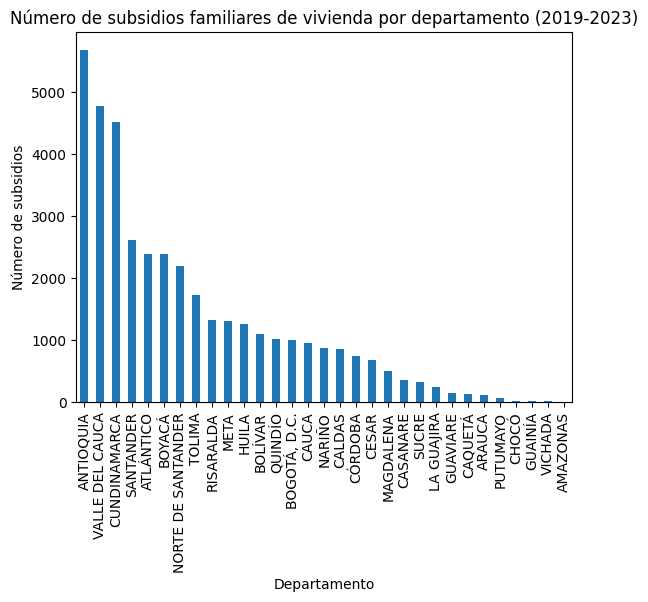

In [ ]:
# Graficamos el resultado de numero_subsidios_por_departamento

numero_subsidios_por_departamento.plot(kind='bar')
plt.title('Número de subsidios familiares de vivienda por departamento (2019-2023)')
plt.xlabel('Departamento')
plt.ylabel('Número de subsidios')
plt.show()


**Conclusión 1 df1:** De acuerdo con el grafico anterior podemos inferir que dentro de los años 2019 y 2023 los dos departamentos que mayormente obtuvieron subsidios de vivienda fueron Antioquia y Valle Del Cauca

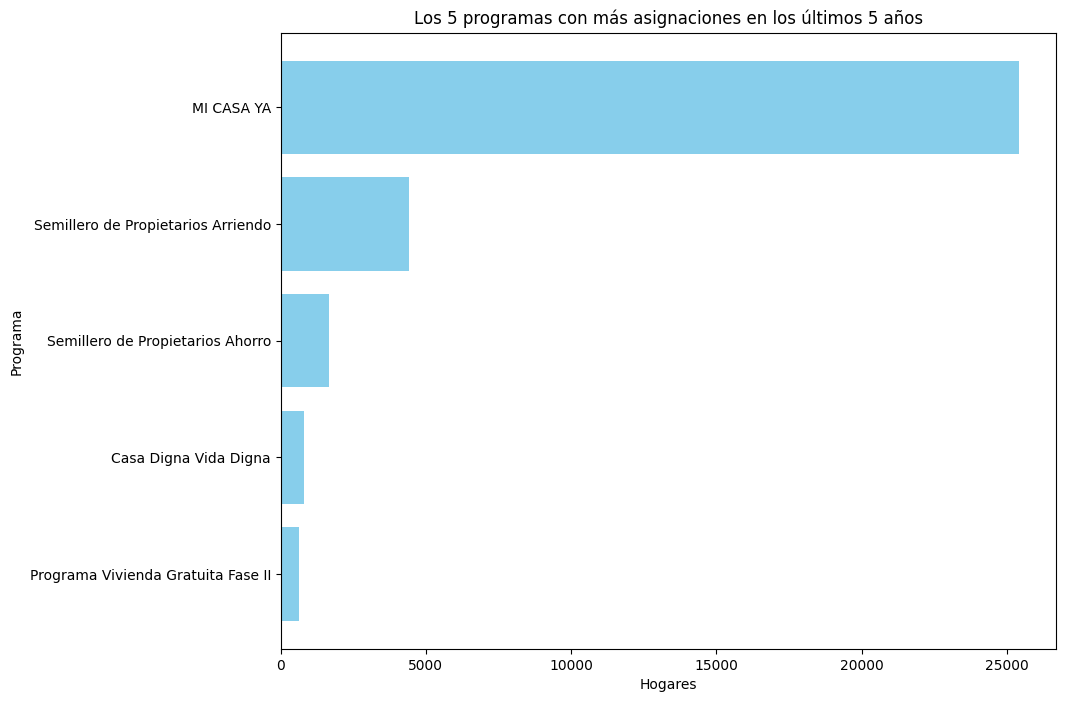

In [ ]:
# Convertir 'Año de Asignación' a datetime si es necesario
df1_filtrado['Año de Asignación'] = pd.to_datetime(df1['Año de Asignación'], format='%Y')

# Filtrar los datos de los últimos 5 años
ultimo_ano = df1['Año de Asignación'].dt.year.max()
inicio_periodo = ultimo_ano - 5
df_filtrado = df1[df1['Año de Asignación'].dt.year > inicio_periodo]

# Agrupar por 'Programa' y contar el número de asignaciones por 'Hogares'
resultado = df_filtrado.groupby('Programa')['Hogares'].count().reset_index()

# Ordenar los resultados por 'Programa' para visualizar
resultado = resultado.sort_values(by='Hogares', ascending=False).head(5)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.barh(resultado['Programa'], resultado['Hogares'], color='skyblue')
plt.xlabel('Hogares')
plt.ylabel('Programa')
plt.title('Los 5 programas con más asignaciones en los últimos 5 años')
plt.gca().invert_yaxis()
plt.show()


**Conclusión 2 df1:** Se logra evidenciar que a nivel nacional el programa de subsidios de vivienda más importante es Mi Casa Ya y como consiguiente el Semillero de Propietarios Arriendo, esto dentro de los últimos 5 años y con base a la cantidad de hogares beneficiados


1.   Mi Casa ya con un total de 226.843 hogares
2.   Semillero de Propietarios Arriendo con un total de 18.204 hogares



## *Analisis df2*

In [ ]:
# Subsidios familiares de vivienda por departamento
# Agrupamos por 'Departamento' y contamos los subsidios familiares de vivienda asignados
numero_subsidios_por_departamento = df2.groupby('Departamento')['No.SFV Asignados'].count()

# Ordenamos de mayor a menor
numero_subsidios_por_departamento = numero_subsidios_por_departamento.sort_values(ascending=False)

# Mostrar el resultado
print(numero_subsidios_por_departamento)

Departamento
CAUCA                 48
ANTIOQUIA             36
CESAR                 22
BOLIVAR               20
SUCRE                 17
NARIÑO                15
TOLIMA                13
CALDAS                12
NORTE DE SANTANDER    11
CORDOBA                9
CHOCO                  9
VALLE DEL CAUCA        9
PUTUMAYO               8
SANTANDER              7
BOYACA                 7
HUILA                  6
META                   6
ARAUCA                 6
CASANARE               5
GUAVIARE               5
MAGDALENA              5
CUNDINAMARCA           4
VICHADA                4
RISARALDA              4
CAQUETA                3
BOGOTA D. C.           2
AMAZONAS               2
Name: No.SFV Asignados, dtype: int64


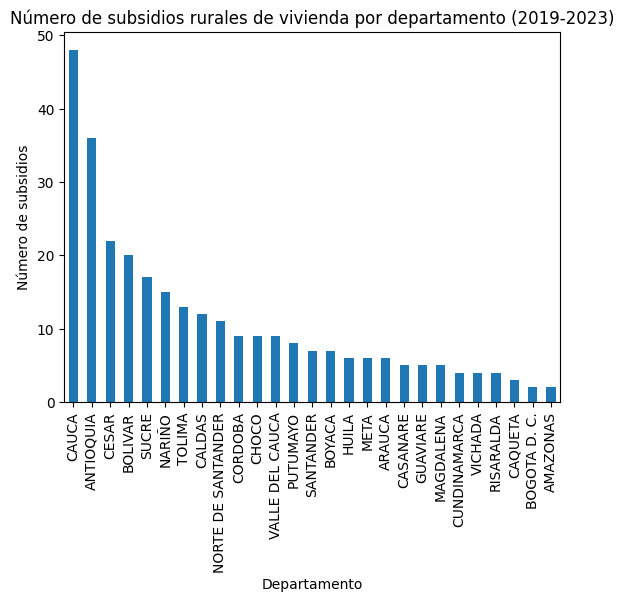

In [ ]:
# Graficamos el resultado de numero_subsidios_por_departamento

numero_subsidios_por_departamento.plot(kind='bar')
plt.title('Número de subsidios rurales de vivienda por departamento (2019-2023)')
plt.xlabel('Departamento')
plt.ylabel('Número de subsidios')
plt.show()

**Conclusión 1 df2:** Los departamentos del Cauca y Antioquia son dos de los más beneficiados por los subsidios rurales desde el 2019, por el contrario Amazonas a contados con tan solo 2 subsidios asignados dentro del 2019 y 2023

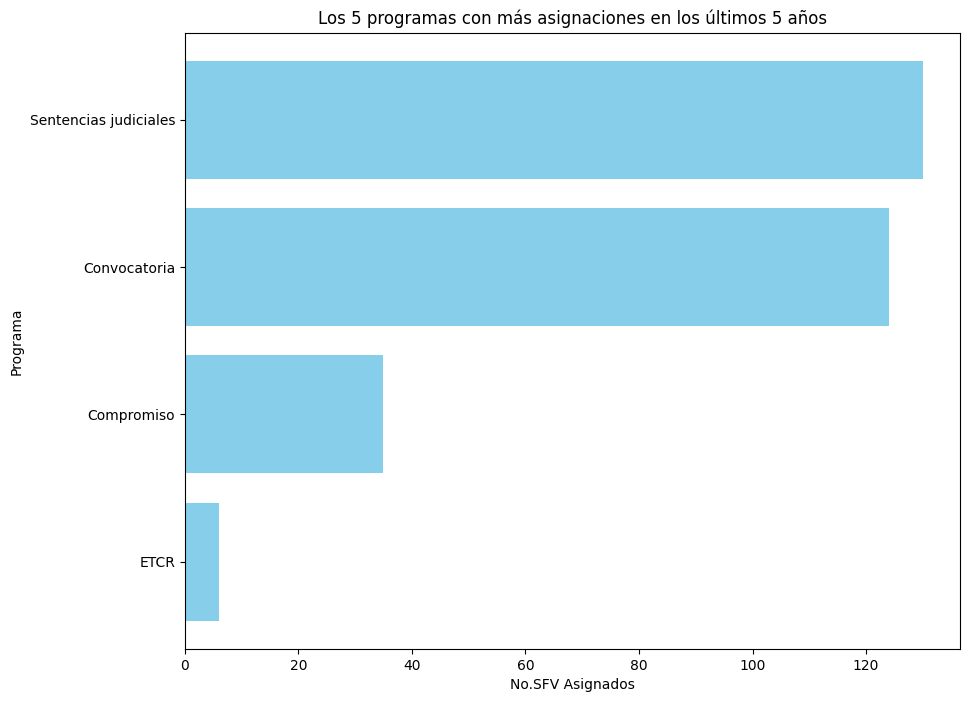

In [ ]:
# Los 5 Departamentos con más asignaciones en los últimos 5 años
# Convertir 'Año de Asignación' a datetime si es necesario
df2['Año de Asignacion'] = pd.to_datetime(df2['Año de Asignacion'], format='%Y')

# Filtrar los datos de los últimos 5 años
ultimo_ano = df2['Año de Asignacion'].dt.year.max()
inicio_periodo = ultimo_ano - 5
df_filtrado = df2[df2['Año de Asignacion'].dt.year > inicio_periodo]

# Agrupar por 'Programa' y contar el número de asignaciones (o cualquier otra métrica)
resultado = df_filtrado.groupby('Programa')['No.SFV Asignados'].count().reset_index()

# Ordenar los resultados por 'Programa' para visualizar
resultado = resultado.sort_values(by='No.SFV Asignados', ascending=False).head(5)

# Graficar los resultados
plt.figure(figsize=(10, 8))
plt.barh(resultado['Programa'], resultado['No.SFV Asignados'], color='skyblue')
plt.xlabel('No.SFV Asignados')
plt.ylabel('Programa')
plt.title('Los 5 programas con más asignaciones en los últimos 5 años')
plt.gca().invert_yaxis()
plt.show()


**Conclusión 2 df2:** De la gráfica anterior podemos deducir que los programas más relevantes dentro de los subsidios rurales son Sentencias Judiciales y Convocatorias, esto a partir del 2019

## **AGRUPACIÓN Y ANALISIS DE DATOS OBTENIDOS**

---



En este momento agruparemos ambos dataframe partiendo de la cantidad de subsidios asignados en los últimos 2 años, es importante resaltar que se realizó con base al código divipola departamental

In [ ]:
# Convertir 'Año de Asignación' a datetime si es necesario
df1['Año de Asignación'] = pd.to_datetime(df1['Año de Asignación'], format='%Y')

# Filtrar los datos de los últimos 2 años
ultimo_ano = df1['Año de Asignación'].dt.year.max()
inicio_periodo = ultimo_ano - 2
df_filtrado = df1[df1['Año de Asignación'].dt.year > inicio_periodo]

# Convertir 'Año de Asignación' a datetime si es necesario
df2['Año de Asignacion'] = pd.to_datetime(df2['Año de Asignacion'], format='%Y')

# Filtrar los datos de los últimos 2 años
ultimo_ano = df2['Año de Asignacion'].dt.year.max()
inicio_periodo = ultimo_ano - 2
df_filtrado = df2[df2['Año de Asignacion'].dt.year > inicio_periodo]


# Agrupar df2 por 'Departamento' y contar 'No.SFV Asignados'
subsidios_df2 = df2.groupby('Código Divipola Departamento')['No.SFV Asignados'].count().reset_index()
subsidios_df2.rename(columns={'No.SFV Asignados': 'SFV rural'}, inplace=True)

# Agrupar df1 por 'Departamento' y contar 'Hogares'
subsidios_df1 = df1.groupby('Código Divipola Departamento')['Hogares'].count().reset_index()
subsidios_df1.rename(columns={'Hogares': 'Hogares'}, inplace=True)

# Combinar los resultados en un solo DataFrame usando merge
subsidios_combinados = pd.merge(subsidios_df1, subsidios_df2, on='Código Divipola Departamento', how='outer')

# Mostrar el DataFrame combinado
print(subsidios_combinados)


    Código Divipola Departamento  Hogares  SFV rural
0                              5    10369       36.0
1                              8     4630        NaN
2                             11     1823        2.0
3                             13     2562       20.0
4                             15     3825        7.0
5                             17     2042       12.0
6                             18      712        3.0
7                             19     1986       48.0
8                             20     1979       22.0
9                             23     1759        9.0
10                            25     6791        4.0
11                            27      393        9.0
12                            41     2500        6.0
13                            44      775        NaN
14                            47     1402        5.0
15                            50     2489        6.0
16                            52     2412       15.0
17                            54     3999     

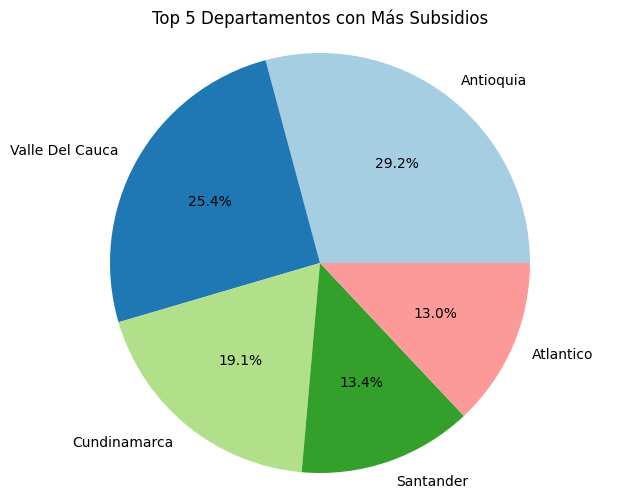

In [ ]:
# Calcular 'Total_Subsidios'
subsidios_combinados['Total_Subsidios'] = subsidios_combinados['Hogares'].fillna(0) + subsidios_combinados['SFV rural'].fillna(0)

# Obtener los 5 departamentos con más subsidios
top_5_departamentos = subsidios_combinados.groupby('Código Divipola Departamento')['Total_Subsidios'].sum().nlargest(5).reset_index()

# Diccionario de mapeo de códigos a nombres de departamentos
codigo_a_nombre = {
    5: 'Antioquia',
    76: 'Valle Del Cauca',
    25: 'Cundinamarca',
    68: 'Santander',
    8: 'Atlantico'
}

# Mapear los códigos a los nombres de los departamentos
top_5_departamentos['Departamento'] = top_5_departamentos['Código Divipola Departamento'].map(codigo_a_nombre)

# Graficar el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(top_5_departamentos['Total_Subsidios'], labels=top_5_departamentos['Departamento'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 5 Departamentos con Más Subsidios')
plt.axis('equal')
plt.show()

**Conclusión:** Es importante resaltar que tanto en la data de df1 y df2 los departamentos más beneficiados fueron Antioquia y Valle Del Cauca; con base al grafico anterior podemos visualizar que tanto en subsidios gubernamentales como rurales son estos dos departamentos los que más reciben apoyo económico


